# Part II - (Investigating some key features that influences trip duration in 201902 Fordgobike Trip)
## by (Martin Ikpe)


## Investigation Overview
I will be investigating some key features that influences trip duration in 201902 Fordgobike Trip.
There are some key features that impact greatly(positively or negatively) on Trip duration. The main purpose of this investigation is to identify the extent at which these features influences the duration.
1. The influence of weekdays & /daytime on Trip duration
2. The influence of user_type & bike_share_for_all_trip on Trip duration
3. The influence of Age on Trip duration


## Dataset Overview
### 201902 Fordgobike Trip Dataset
This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. This Datsset was gotten from udacity server. I will be using an already cleaned and transformed 201902 Fordgobike Trip Dataset I uploaded to my notebook. The fpllowing features shall be considered among others:
start_day,
start_session,
user_type, 
bike_share_for_all_trip,
age,
duration_sec.

In [23]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [30]:
# loading in the dataset into a pandas dataframe
gobike = pd.read_csv('201902-fordgobike-tripdata_master.csv')
gobike.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,start_month,end_month,start_day,end_day,start_hour,end_hour,age,same_station_round_trip,start_session
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,No,February,March,Thursday,Friday,17,8,35,False,Afternoon
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,No,February,March,Thursday,Friday,12,5,47,False,Morning
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,No,February,March,Thursday,Friday,17,4,30,False,Afternoon
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Yes,February,March,Thursday,Friday,23,0,45,False,Night
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,No,February,March,Thursday,Friday,23,0,60,False,Night


In [32]:
#converting share bike column to catrgory
gobike.bike_share_for_all_trip = gobike.bike_share_for_all_trip.astype('category')

#converting the start_day column to category
from pandas.api.types import CategoricalDtype
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
gobike['start_day']=gobike['start_day'].astype(cat_type)

print(gobike.start_day.unique())
gobike.info()

[Thursday, Wednesday, Tuesday, Monday, Sunday, Saturday, Friday]
Categories (7, object): [Monday < Tuesday < Wednesday < Thursday < Friday < Saturday < Sunday]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 25 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender             

In [25]:
#creating a function to be used for chart plotting

def plot_chart(df,x,h,t):
    plt.figure(figsize = [10, 10])
    sb.countplot(data = df, x = x, hue = h).set(xlabel=x, title=t)
    plt.xlabel(x, fontsize=12)
    plt.title(t, fontsize=12)
    plt.legend()
    return plt.show();

def bar_chart(df,x,y,h,t):
    plt.figure(figsize = [10, 10])
    sb.countplot(data=df, x=x, hue=h).set(xlabel=x, ylabel=y, title=t)
    plt.xlabel(x, fontsize=12)
    plt.ylabel(y, fontsize=12)
    plt.title(t, fontsize=12)
    plt.legend()
    return plt.show();

def scatter_chart(df,x,y,t):
    plt.figure(figsize = [10, 10])
    sb.regplot(data = df, x = x, y = y).set(xlabel=x, ylabel=y, title=t)
    plt.xlabel(x, fontsize=12)
    plt.ylabel(y, fontsize=12)
    plt.title(t, fontsize=12)
    plt.legend()
    return plt.show();
                          

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## The influence of weekdays & daytime on Trip duration.

This visualization shows that most trips took place within the weekdays while less trips were taken on weekends. The trips were also taken more in the morning and than afternoon.
This means that the participants were more available on Thursdays and Tuesdays especially in the morning and some in the afternoon. We can also assume that the the people that participated over the weekend were more of working class.
We can conclude that the day of the week and the time of the day at which the trip was taken has great influence on the trip count and duration.


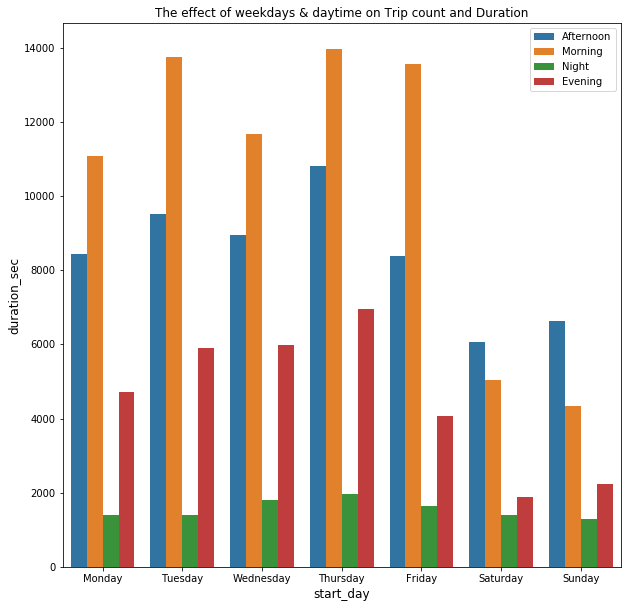

In [33]:
bar_chart(gobike,'start_day','duration_sec','start_session','The effect of weekdays & daytime on Trip count and Duration')
#bar_chart(gobike,'start_day','start_session','The effect of weekdays & daytime on Trip count and Duration')

## The influence of user type & bike share on Trip duration.


The users that participated in this Bike trip were divided into two namely: the subcribers and the Customers. Secondly the subscribers were only the ones that shared their Bike while the customers did not share their bike at all.

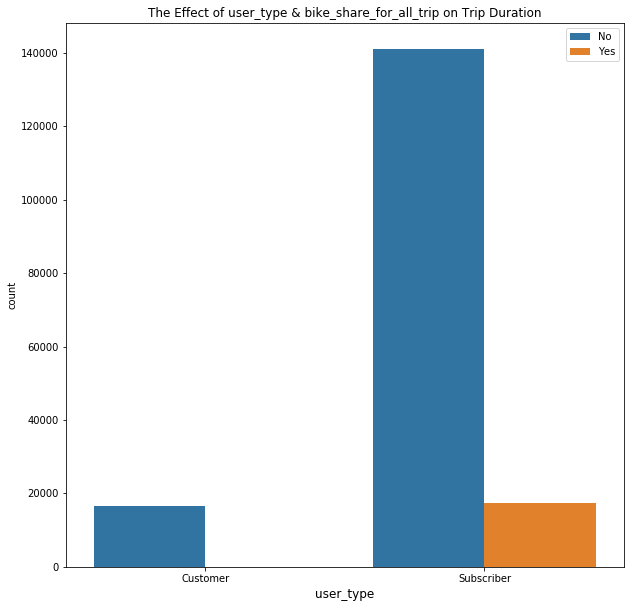

In [22]:
plot_chart(gobike,'user_type','bike_share_for_all_trip','The Effect of user_type & bike_share_for_all_trip on Trip Duration')

## The influence of Age on Trip duration.

The Age of the paticipants has negative correlation on the duration of the trip. This means that the increase in age brings about decrease in duration.


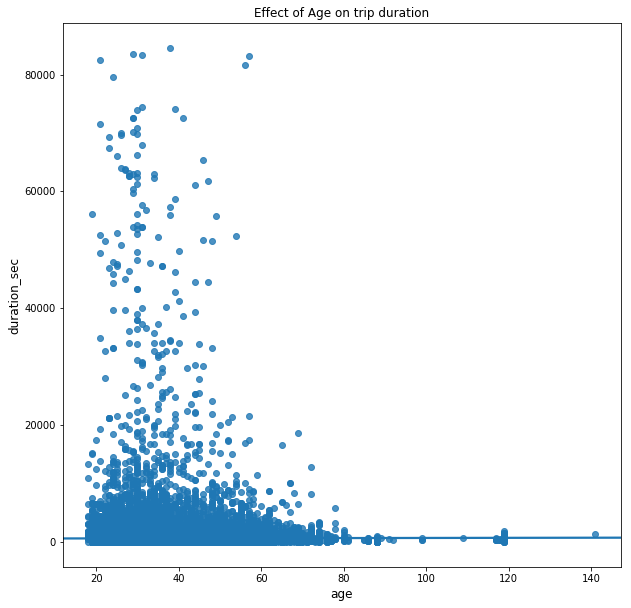

In [6]:
scatter_chart(gobike,'age','duration_sec','Effect of Age on trip duration')

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 374159 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
